# A2-bank.csv

### Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv
bank = pd.read_csv('A2-bank/bank-additional-full.csv', sep=';')

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Preprocess

In [2]:
# Change missing values to mean for numerical columns in a loop
for col in bank.columns:
    if bank[col].dtype == 'int64' or bank[col].dtype == 'float64':
        bank[col].fillna(bank[col].mean(), inplace=True)

# Convert 'unknown' to NaN
bank.replace('unknown', np.nan, inplace=True)

# Change missing values to mode for categorical columns in a loop except for y
for col in bank.columns:
    if bank[col].dtype == 'object' and col != 'y':
        bank[col].fillna(bank[col].mode()[0], inplace=True)

# One hot encoding for categorical columns except for y
bank = pd.get_dummies(bank, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                                     'day_of_week', 'poutcome'])

# Change y to 0 and 1
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})

# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bank[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
      'euribor3m', 'nr.employed']] = scaler.fit_transform(
    bank[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
           'euribor3m', 'nr.employed']])

# move y to the last column
y = bank['y']
bank.pop('y')
bank['y'] = y


bank.head()



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,False,False,True,False,False,False,False,True,False,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,False,False,True,False,False,False,False,True,False,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,False,False,True,False,False,False,False,True,False,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,False,False,True,False,False,False,False,True,False,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,False,False,True,False,False,False,False,True,False,0


### Output Train and Test

In [3]:
# Save the training and testing data
bank.to_csv('A2-bank/full.csv', sep=';', index=False)


### Plot the data

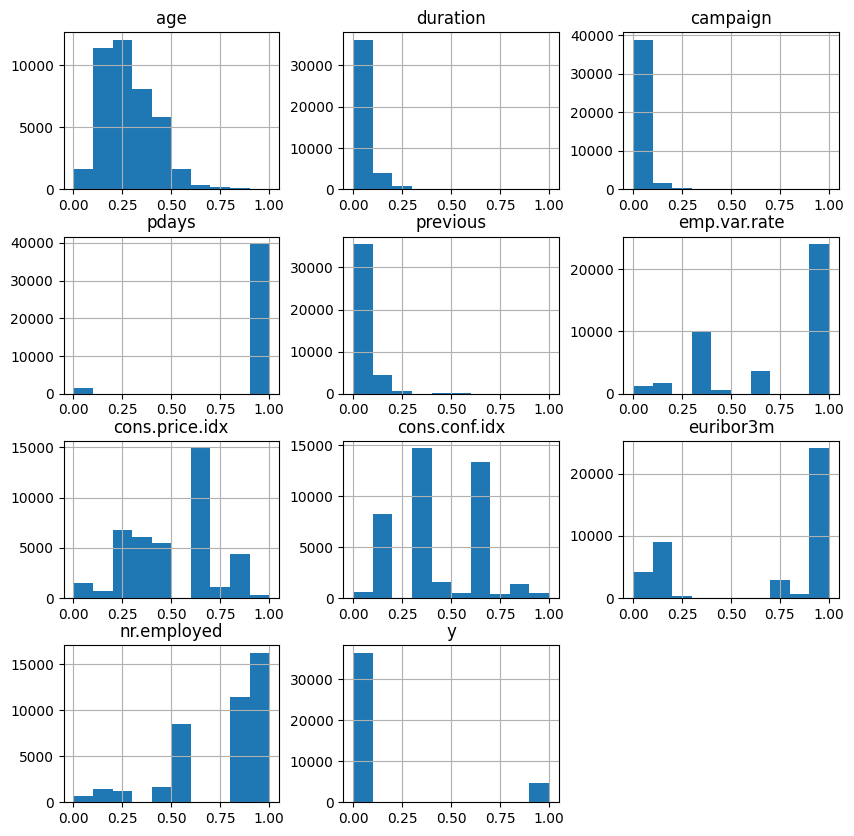

In [7]:
# Plot the distribution of all the columns
bank.hist(figsize=(10, 10))
plt.show()